In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv("/Users/dev/Personal/DS & AI Class Notes/Data Sets/Adaboost/ionosphere.csv",header=None)
print(f'Shape of this Df is {df.shape}')

Shape of this Df is (351, 35)


In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [7]:
df[34].value_counts()

g    225
b    126
Name: 34, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='34', ylabel='count'>

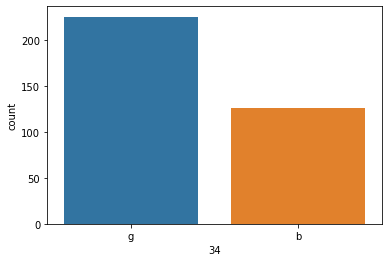

In [33]:
sns.countplot(df[34])

### Not Converting Zeros...bcz This is the readings from ionosphere

In [41]:
# def checkz(df):
#     return df[df == 0].value_counts()

### OD_Tech With The help of Skew


In [43]:
def odiqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    m = df.mean()
    df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
    return df

In [44]:
def odmsd(df):
    m = round(df.mean(),2)
    s = round(df.std(),2)
    low = round(m-(3*s),2)
    high = round(m+(3*s),2)
    ft1 = df[df<low]
    ft2 = df[df>high]
    df = df.map(lambda x : low if x < low else (high if x > high else x ))

In [48]:
clist = df.columns[0:34:1]

In [71]:
for i in clist:
    print(f'df[{i}] is {df[i].skew()}')

df[0] is -2.5323916927746875
df[1] is 0
df[2] is -1.0566492308101287
df[3] is -0.31123659803843284
df[4] is -1.1196550962168321
df[5] is -0.09604935374426678
df[6] is -0.6849465691274137
df[7] is 0.8784215726045065
df[8] is -1.091865490620716
df[9] is 0.7434642505185263
df[10] is -1.0449182989523051
df[11] is 0.6564776207934505
df[12] is -0.8762252925043287
df[13] is -0.2869183597082546
df[14] is -0.775887916632921
df[15] is -0.4028674423709859
df[16] is -0.8215933852990374
df[17] is -0.4618386085440896
df[18] is -0.8334091748984301
df[19] is -0.4764512050752836
df[20] is -0.6659952280384075
df[21] is 0.2260995374893918
df[22] is -0.7445188392447166
df[23] is -0.6229677445250411
df[24] is -0.8815884424664308
df[25] is -0.10321233678266069
df[26] is -0.8659375475102582
df[27] is 0.06670741709852014
df[28] is -0.8857493984579341
df[29] is 0.4274758095380154
df[30] is -0.810505655389402
df[31] is -0.3977720219765499
df[32] is -0.6060703822683292
df[33] is 0.2892842427110461


In [76]:
for i in clist:
    if df[i].skew() <= 0.5:
        odmsd(df[i])
    else:
        df[i] = odiqr(df[i])

### After OD_Tech the skew is

In [77]:
for i in clist:
    print(f'df[{i}] is {df[i].skew()}')

df[0] is -2.5323916927790995
df[1] is 0
df[2] is -0.949268493557784
df[3] is -0.18043861118459742
df[4] is -0.7439088387623786
df[5] is -0.09604935374426678
df[6] is -0.6849465691274137
df[7] is 0.8784215726045065
df[8] is -1.091865490620716
df[9] is 0.7434642505185263
df[10] is -1.0449182989523051
df[11] is 0.6564776207934505
df[12] is -0.8762252925043287
df[13] is -0.2869183597082546
df[14] is -0.775887916632921
df[15] is -0.4028674423709859
df[16] is -0.8215933852990374
df[17] is -0.003433630221364058
df[18] is -0.8334091748984301
df[19] is -0.4764512050752836
df[20] is -0.6659952280384075
df[21] is 0.13232518985257996
df[22] is -0.7445188392447166
df[23] is -0.6229677445250411
df[24] is -0.8815884424664308
df[25] is 0.24513465361764114
df[26] is -0.8433647640795688
df[27] is 0.06670741709852014
df[28] is -0.8857493984579341
df[29] is -1.1230615836421676
df[30] is -0.810505655389402
df[31] is 0.4887170002680576
df[32] is -0.6060703822683292
df[33] is 0.2892842427110461


In [78]:
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,0,0.99539,-0.058890,0.85243,0.023060,0.83398,-0.37708,1.00000,0.03760,...,-0.067422,0.41078,-0.46168,0.21266,-0.016653,0.42267,-0.020315,0.18641,-0.011235,g
1,1.0,0,1.00000,0.062693,0.93035,0.133493,-0.10868,0.11936,1.00000,-0.04549,...,-0.265690,-0.20468,-0.18401,-0.19040,-0.016653,-0.16626,-0.016796,-0.13738,-0.024470,b
2,1.0,0,1.00000,-0.033650,1.00000,0.004850,1.00000,-0.12062,0.88965,0.01198,...,-0.067422,0.58984,-0.22145,0.43100,-0.016653,0.60436,-0.023662,0.56045,-0.011235,g
3,1.0,0,1.00000,0.062693,1.00000,0.115889,0.71216,0.11936,0.00000,0.00000,...,-0.071187,0.51613,1.00000,1.00000,-0.016653,0.25682,-0.003794,-0.32382,0.014480,b
4,1.0,0,1.00000,-0.024010,0.94140,0.065310,0.92106,-0.23255,0.77152,-0.16399,...,-0.085989,0.13290,-0.53206,0.02431,-0.017082,-0.05707,-0.020315,-0.04608,-0.011235,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0,0.83508,0.082980,0.73739,-0.147060,0.84349,-0.05567,0.90441,-0.04622,...,-0.042020,0.83479,0.00123,1.00000,-0.016653,0.86660,-0.023662,0.90546,-0.043070,g
347,1.0,0,0.95113,0.004190,0.95183,-0.027230,0.93438,-0.01920,0.94590,0.01606,...,0.013610,0.93522,0.04925,0.93159,-0.016653,0.94066,-0.000350,0.91483,0.047120,g
348,1.0,0,0.94701,-0.000340,0.93207,-0.032270,0.95177,-0.03431,0.95584,0.02446,...,0.031930,0.92489,0.02542,0.92120,-0.016543,0.92459,0.004420,0.92697,-0.005770,g
349,1.0,0,0.90608,-0.016570,0.98122,-0.019890,0.95691,-0.03646,0.85746,0.00110,...,-0.020990,0.89147,-0.07760,0.82983,-0.016653,0.96022,-0.037570,0.87403,-0.002622,g


### Encoding of df[34] with Label Encoder

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()

In [83]:
le.fit(df[34])

LabelEncoder()

In [82]:
le.classes_

array(['b', 'g'], dtype=object)

In [89]:
df = pd.concat([df,pd.DataFrame(le.fit_transform(df[34]),columns=["b=0&g=1"])],axis=1).drop(34,axis=1)

##  Shuffling The Data to prevent the model to get into the Comfort Zone

In [114]:
df = df.sample(frac=1)

### Splitting

In [115]:
X = df.drop("b=0&g=1",axis=1)

In [116]:
X.sample()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
23,0.999863,0,0.641342,0.044372,0.704628,0.0,0.0,0.0,-1.0,1.0,...,-1.0,-0.13163,1.0,-1.0,1.0,-0.027907,-1.0,-0.003794,0.0,0.0


In [117]:
y = df["b=0&g=1"]

In [118]:
y.sample()

276    1
Name: b=0&g=1, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

In [120]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20)

In [121]:
X.shape , Xtrain.shape , Xtest.shape

((351, 34), (280, 34), (71, 34))

In [122]:
y.shape , ytrain.shape , ytest.shape

((351,), (280,), (71,))

In [123]:
kf = KFold(n_splits=12)

In [124]:
dct = DecisionTreeClassifier()

In [125]:
rfc = RandomForestClassifier()

In [126]:
algo = [ dct , rfc ]

### Without Feature Scaling

In [127]:
for i in algo:
    i.fit(Xtrain,ytrain)
    s = i.score(Xtest,ytest)
    print(f'{i} = {s}')

DecisionTreeClassifier() = 0.8732394366197183
RandomForestClassifier() = 0.9295774647887324


### With Feature Scaling

In [128]:
ss = StandardScaler()

In [129]:
ss.fit(Xtrain)

StandardScaler()

In [130]:
Xtrain_ss = ss.transform(Xtrain)

In [131]:
Xtest_ss = ss.transform(Xtest)

In [132]:
for i in algo:
    i.fit(Xtrain_ss,ytrain)
    s = i.score(Xtest_ss,ytest)
    print(f'{i} = {s}')

DecisionTreeClassifier() = 0.8591549295774648
RandomForestClassifier() = 0.9436619718309859


### With Cross Validation

In [133]:
for i in algo:
    s = cross_val_score(i,X,y,cv = kf)
    print(f'{i} = {s.mean()}')

DecisionTreeClassifier() = 0.8699233716475095
RandomForestClassifier() = 0.8979885057471265


## Boosting

In [134]:
rfc1 = RandomForestClassifier(n_estimators=150,max_depth=2,max_leaf_nodes=3)

In [135]:
abc = AdaBoostClassifier()

In [151]:
gbs = GradientBoostingClassifier(learning_rate=0.02,n_estimators=133,criterion='mse',max_depth=5)
                                                                    #mse =mean squared error

In [152]:
algo1 = [rfc1  , abc , gbs ]

In [153]:
for i in algo1:
    print(i)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150)
AdaBoostClassifier()
GradientBoostingClassifier(criterion='mse', learning_rate=0.02, max_depth=5,
                           n_estimators=133)


### Without Feature Scaling

In [154]:
for i in algo1:
    i.fit(Xtrain,ytrain)
    s = i.score(Xtest,ytest)
    print(f'{i} = {s}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.9014084507042254
AdaBoostClassifier() = 0.9014084507042254
GradientBoostingClassifier(criterion='mse', learning_rate=0.02, max_depth=5,
                           n_estimators=133) = 0.8873239436619719


### With Feature Scaling

In [155]:
for i in algo1:
    i.fit(Xtrain_ss,ytrain)
    s = i.score(Xtest_ss,ytest)
    print(f'{i} = {s}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.8873239436619719
AdaBoostClassifier() = 0.9014084507042254
GradientBoostingClassifier(criterion='mse', learning_rate=0.02, max_depth=5,
                           n_estimators=133) = 0.8873239436619719


###  With Cross Validation (Boosting)

In [156]:
%%time
for i in algo1:
    s = cross_val_score(i,X,y,cv = kf)
    print(f'{i} = {s.mean()}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.8668582375478927
AdaBoostClassifier() = 0.889463601532567
GradientBoostingClassifier(criterion='mse', learning_rate=0.02, max_depth=5,
                           n_estimators=133) = 0.8980842911877395
CPU times: user 5.65 s, sys: 44 ms, total: 5.7 s
Wall time: 5.71 s


### With GridSearch CV

In [157]:
from sklearn.model_selection import GridSearchCV

In [165]:
dic = { 'n_estimators' : [100,125,180] , 'loss' : ['deviance', 'exponential'] , 'max_depth' : [2,3,6]
       ,'min_samples_leaf' : [1,5] , 'learning_rate' : [0.1 , 0.01, 0.05] ,
        'criterion' : ['friedman_mse', 'mse']  }

In [166]:
kf1 = KFold(n_splits=13)

### GVC Without SScaler

In [167]:
gvc = GridSearchCV(GradientBoostingClassifier(),param_grid=dic,cv = kf1)

In [168]:
%%time
gvc.fit(X,y)

CPU times: user 10min 34s, sys: 692 ms, total: 10min 35s
Wall time: 10min 36s


GridSearchCV(cv=KFold(n_splits=13, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 3, 6], 'min_samples_leaf': [1, 5],
                         'n_estimators': [100, 125, 180]})

In [169]:
gvc.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [170]:
gvc.best_estimator_

GradientBoostingClassifier(loss='exponential')

In [171]:
gvc.best_score_

0.9202279202279203

### GVC With SScaler

In [172]:
ss1 = StandardScaler()

In [174]:
X_ss1 = ss1.fit_transform(X)

In [175]:
gvc1 = GridSearchCV(GradientBoostingClassifier(),param_grid=dic,cv = kf1)

In [178]:
%%time
gvc1.fit(X_ss1,y)

CPU times: user 10min 33s, sys: 2.46 s, total: 10min 36s
Wall time: 10min 36s


GridSearchCV(cv=KFold(n_splits=13, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 3, 6], 'min_samples_leaf': [1, 5],
                         'n_estimators': [100, 125, 180]})

In [179]:
gvc1.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [180]:
gvc1.best_estimator_

GradientBoostingClassifier(loss='exponential')

In [181]:
gvc1.best_score_

0.9230769230769232